In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Here first Step  importing file

In [3]:
Titanic= pd.read_excel("D:\Ai\IEEE\pandas\Final Project/titanic.xls")

In [13]:
pd.set_option('display.max_columns',50)

Titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
# now columns
Titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
Titanic.shape

(1309, 14)

<h1>Here info() get the number  of non-null Values and data type</h1>
<hr>
ممكن من عدد القيم  الي موجوده احدد العمود ده اخده معايا في التحليل ولا لا 
يعني لو عدد القيم مثلا 1500 والقيم الي فعلا موجوده في العمود هي 150 فكده في كده داتا كتير جدا جدا مفقوده هتاثر عليا بالسلب فمش هاخده معايا 
 

In [7]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<h1> Here decribe()</h1>
<h3> give you some calculation describe the column behaviour</h3>

In [8]:
Titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Cleaning Data

---

<h2>first have to delete columns not important like name</h2>

In [51]:
Titanic.drop(["name",'fare','ticket',"home.dest"],axis=1,inplace=True)

In [20]:
Titanic['age']=Titanic['age'].fillna(0)

# Histogram

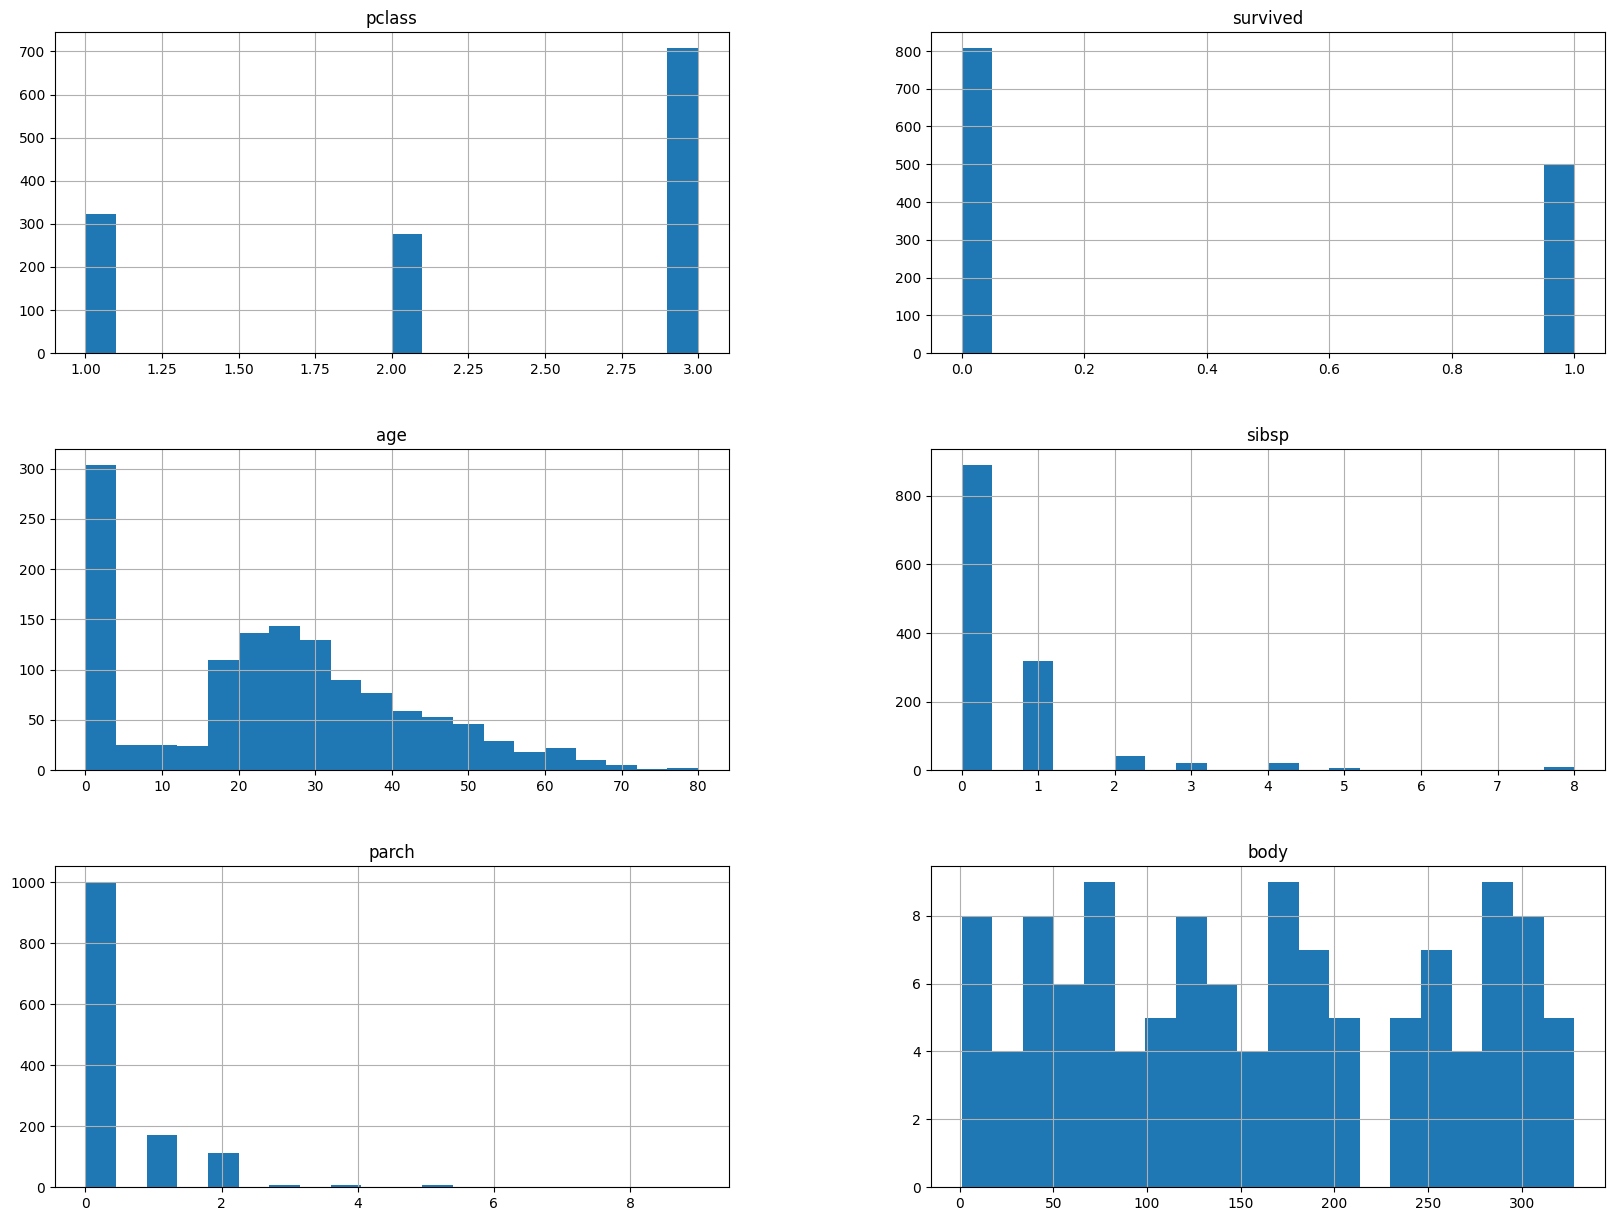

In [52]:
Titanic.hist(bins=20,figsize=(20,15))
# bins control column width
# figsize figuir size (width ,hight)
plt.show()

In [53]:
f=Titanic['body']==Titanic['body'].max()
Titanic.loc[f]

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,boat,body
1304,3,0,female,14.5,1,0,NaN,C,NaN,328.0


# Outliers 



In [67]:
# first to train in remove outliers
# we have to add outlier in a copy of our data frame

# making a copy

#  titanic_copy=Titanic   if let it like that any change in copy will edit in original
# it like equals and refrenced by each other

# here copy withon refrence
titanic_copy=Titanic.copy()

In [68]:
titanic_copy['age'].loc[0:19]=500
# here we make first 50 person thir age is 500 years
# that outliers because if not nature

C:\Users\Soly\AppData\Local\Temp\ipykernel_20976\871586884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_copy['age'].loc[0:19]=500


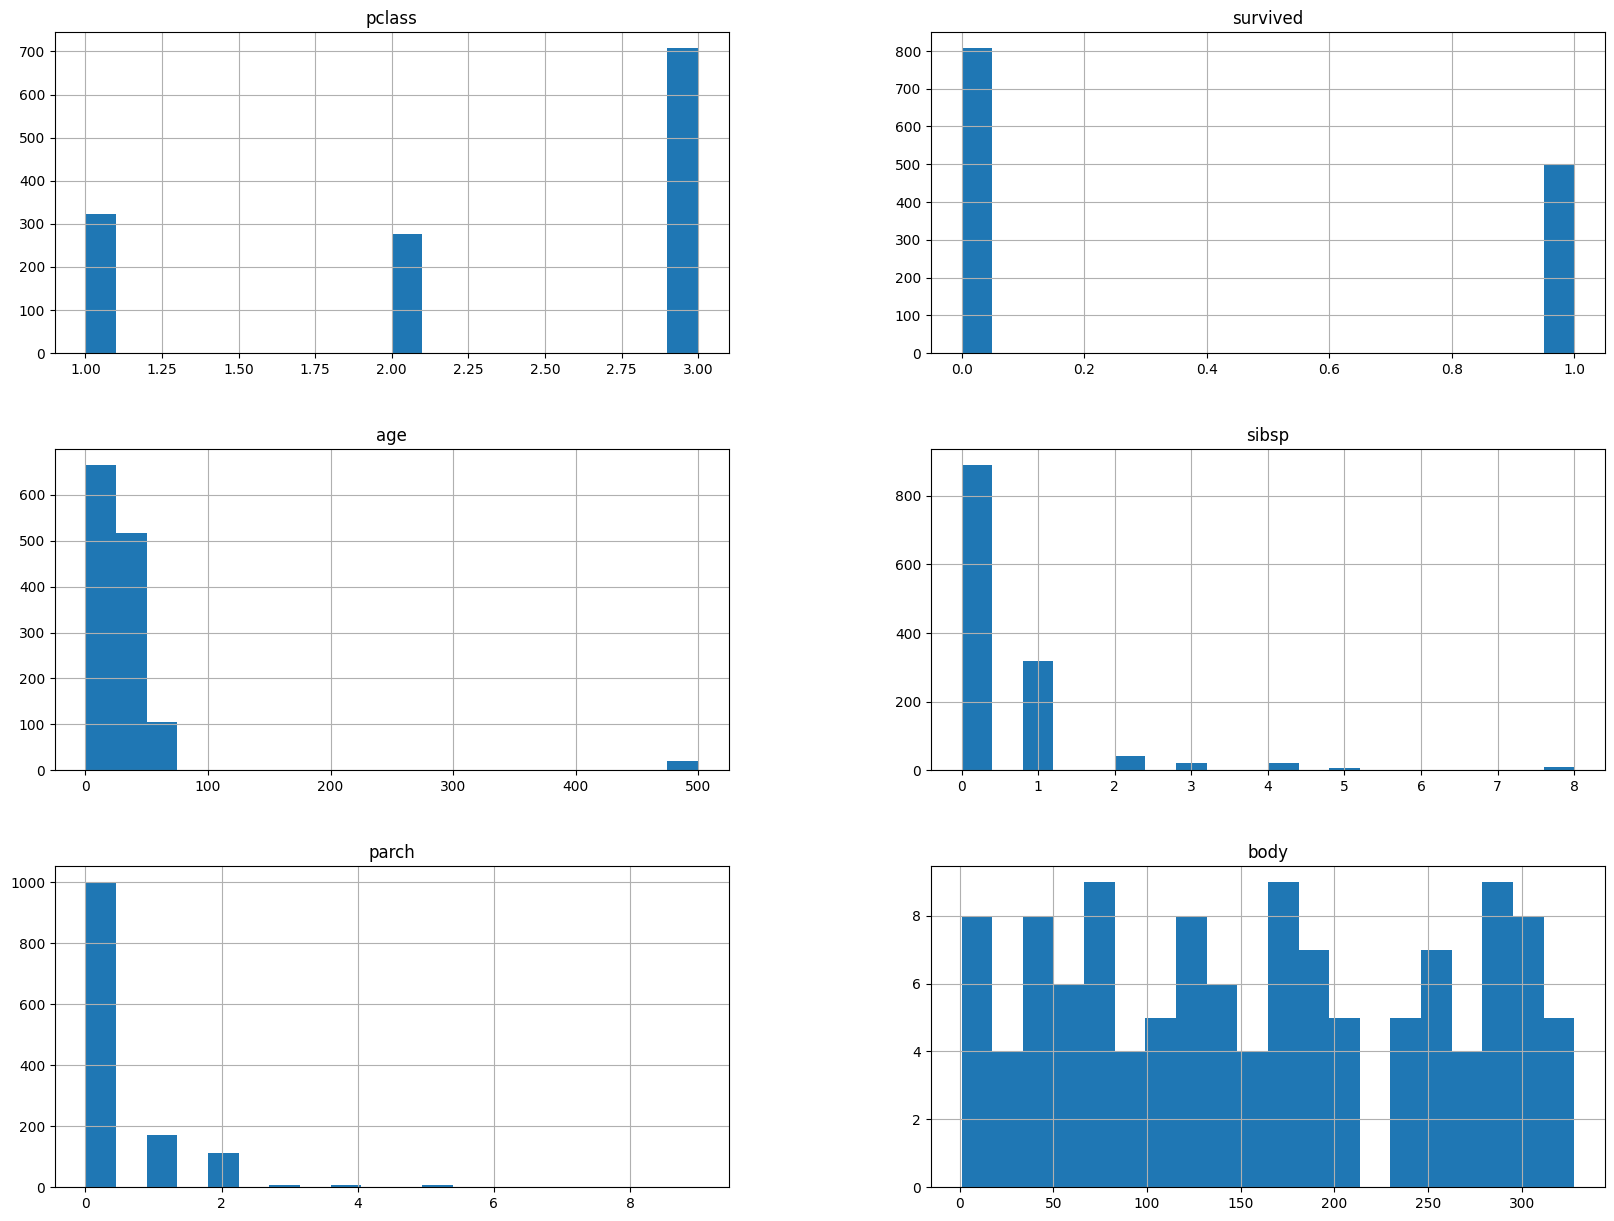

In [69]:
titanic_copy.hist(bins=20,figsize=(20,15))
plt.show()

# زي مانتا شايف  الاوتليرز دي بعيييد اوي عن التوزيع فانت لازم تبص علي الداتا لو لقيت داتا بعيد اوي كده وصغيره
# تشوف حاجتين هل هي بعيد كده وهي حقيقه هنا في المثال ده لا لان مفيش حد عمره 500 سنه 
# فلازم تتشال لانها هتاثر علي الموديل بتاعك بالسلب
# تاني حاجه ممكن هي حاجات بعيده اوي عن كل التوزيع فهي يمكن اهمالها  
# بالبلدي مثلا لكل قاعده شواذ فمثلا نفترض ان الناس كلها بتبقي من 1 ل100 سنه لكن بيتولد كل فين وفين عدد قليل عمرهم 200 سنه
# فبنشيل الناس القليله اوي دي ونشتغل علي العام

In [72]:
titanic_copy.head(30)

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,boat,body
0,1,1,female,500.0,0,0,B5,S,2,NaN
1,1,1,male,500.0,1,2,C22 C26,S,11,NaN
2,1,0,female,500.0,1,2,C22 C26,S,NaN,NaN
3,1,0,male,500.0,1,2,C22 C26,S,NaN,135.0
4,1,0,female,500.0,1,2,C22 C26,S,NaN,NaN
5,1,1,male,500.0,0,0,E12,S,3,NaN
6,1,1,female,500.0,1,0,D7,S,10,NaN
7,1,0,male,500.0,0,0,A36,S,NaN,NaN
8,1,1,female,500.0,2,0,C101,S,D,NaN
9,1,0,male,500.0,0,0,NaN,C,NaN,22.0


In [94]:
# now have to bring the index of the outlier to delete it
filt= titanic_copy[titanic_copy['age']>100]["age"].index
titanic_copy.drop(filt,inplace=True)
titanic_copy

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,boat,body
20,1,1,male,37.0,1,1,D35,S,5,NaN
21,1,1,female,47.0,1,1,D35,S,5,NaN
22,1,1,male,26.0,0,0,C148,C,5,NaN
23,1,1,female,42.0,0,0,NaN,C,4,NaN
24,1,1,female,29.0,0,0,C97,S,8,NaN
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5,1,0,NaN,C,NaN,328.0
1305,3,0,female,0.0,1,0,NaN,C,NaN,NaN
1306,3,0,male,26.5,0,0,NaN,C,NaN,304.0
1307,3,0,male,27.0,0,0,NaN,C,NaN,NaN


In [90]:
#        titanic_copy[titanic_copy['age']>100]['age'].index
#titanic_copy[titanic_copy['age']>100] this return a whole row that contain 500
# after add ['age'] it return  a seris with it index that =500
# index to get index ant locate it in the dataframe

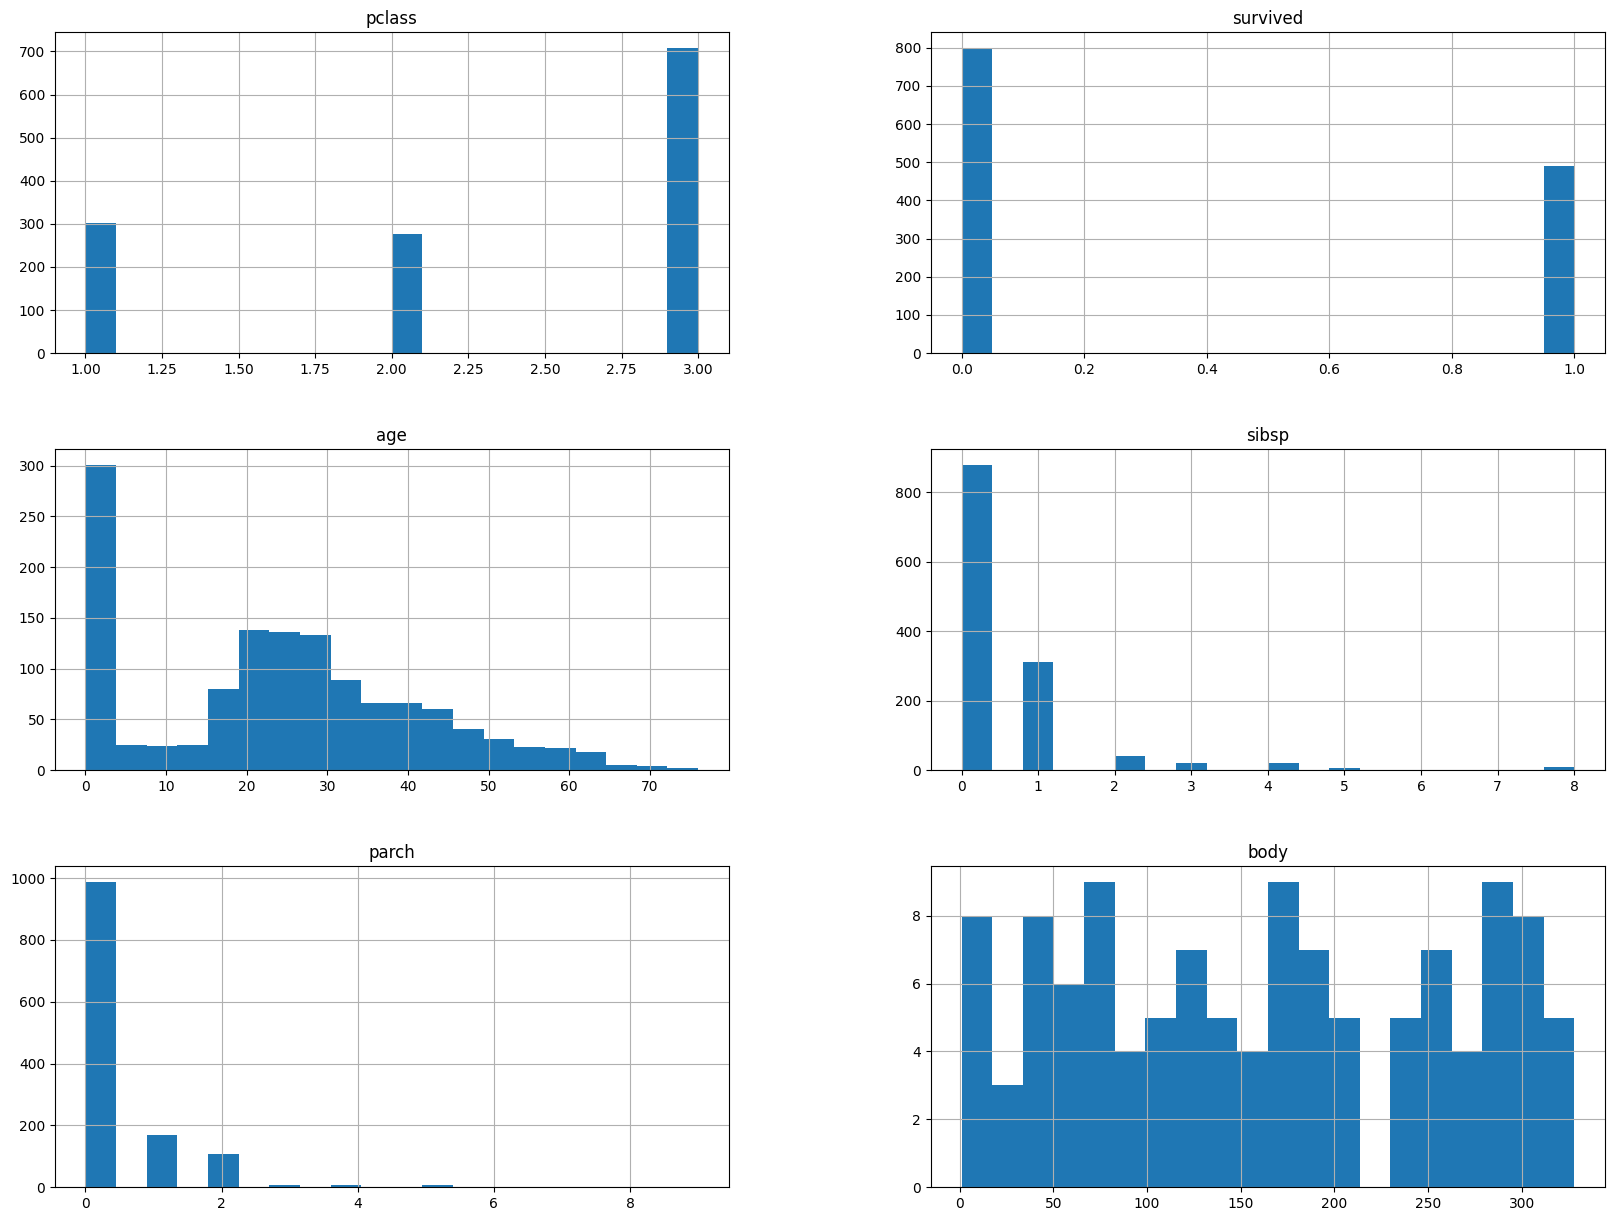

In [95]:
titanic_copy.hist(bins=20,figsize=(20,15))
plt.show()

In [98]:
Titanic.head(10)

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,boat,body
0,1,1,female,29.0000,0,0,B5,S,2,NaN
1,1,1,male,0.9167,1,2,C22 C26,S,11,NaN
2,1,0,female,2.0000,1,2,C22 C26,S,NaN,NaN
3,1,0,male,30.0000,1,2,C22 C26,S,NaN,135.0
4,1,0,female,25.0000,1,2,C22 C26,S,NaN,NaN
5,1,1,male,48.0000,0,0,E12,S,3,NaN
6,1,1,female,63.0000,1,0,D7,S,10,NaN
7,1,0,male,39.0000,0,0,A36,S,NaN,NaN
8,1,1,female,53.0000,2,0,C101,S,D,NaN
9,1,0,male,71.0000,0,0,NaN,C,NaN,22.0


#  alive

In [108]:
# to determine the percentage of the survived men
# first determine men num
male=Titanic[Titanic['sex']=='male']
surv_male=male[male['survived']==1]
# second the survived men percentage
surv_male_perce=(surv_male.shape[0]/male.shape[0])*100
# shape[0] it give you the number of rows
# male.shape[0] the number of row equal to numbers of male  and the sam 

In [110]:
surv_male_perce

19.098457888493474

In [127]:
# there is another way to do that  on male and female with for loop
ma_fe=Titanic['sex'].unique()
for gender in ma_fe:
    print(gender)
    gen=Titanic[Titanic['sex']==gender]
    surv_per=gen[gen['survived']==1]
    surv_per_perce=(surv_per.shape[0]/gen.shape[0])*100
    print("All number of",gender ,'is =',surv_per.shape[0])
    print("Servided = ","%.2f"%surv_per_perce,'% \n \n=====\n') 
    # "%.2f"   بتخلي الرقم العشري بعد العلامه رقمين بس  

female
All number of female is = 339
Servided =  72.75 % 
 
=====

male
All number of male is = 161
Servided =  19.10 % 
 
=====



In [133]:
for pclass in Titanic['pclass'].unique():
    print(pclass)
    newdf=Titanic[Titanic['pclass']==pclass]
    alive=newdf[newdf['survived']==1]
    alive_per = (alive.shape[0]/newdf.shape[0])*100
    print("The count of this class is ",newdf.shape[0])
    print("The percentage of the survived in this class is ","%.2f"%alive_per,"%\n======\n")

1
The count of this class is  323
The percentage of the survived in this class is  61.92 %

2
The count of this class is  277
The percentage of the survived in this class is  42.96 %

3
The count of this class is  709
The percentage of the survived in this class is  25.53 %



In [138]:
# want to make a new column called age category

# first function

def age_category(age):
    if age<4:
        return "baby"
    elif age<10:
        return "child"
    elif age<21:
        return "teen"
    elif age<33:
        return "young adult"
    elif age<50:
        return "adult"
    return "elder"

# this to make the new column with the same num of row like age  
# he take the same value but not problem we will change it

# first way
Titanic['age catgeory']=Titanic['age']

for i in range(Titanic.shape[0]):
    Titanic['age catgeory'].iloc[i] = age_category(Titanic['age'].iloc[i])


C:\Users\Soly\AppData\Local\Temp\ipykernel_20976\934953555.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic['age catgeory'].iloc[i] = age_category(Titanic['age'].iloc[i])
C:\Users\Soly\AppData\Local\Temp\ipykernel_20976\934953555.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'young adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Titanic['age catgeory'].iloc[i] = age_category(Titanic['age'].iloc[i])


In [140]:
Titanic[['age','age catgeory']]

,age,age catgeory
0,29.0000,young adult
1,0.9167,baby
2,2.0000,baby
3,30.0000,young adult
4,25.0000,young adult
...,...,...
1304,14.5000,teen
1305,0.0000,baby
1306,26.5000,young adult
1307,27.0000,young adult


In [152]:
# second way to do that  is
Titanic.drop(['age catgeory'],axis=1,inplace=True)
Titanic

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,boat,body
0,1,1,female,29.0000,0,0,B5,S,2,NaN
1,1,1,male,0.9167,1,2,C22 C26,S,11,NaN
2,1,0,female,2.0000,1,2,C22 C26,S,NaN,NaN
3,1,0,male,30.0000,1,2,C22 C26,S,NaN,135.0
4,1,0,female,25.0000,1,2,C22 C26,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,NaN,C,NaN,328.0
1305,3,0,female,0.0000,1,0,NaN,C,NaN,NaN
1306,3,0,male,26.5000,0,0,NaN,C,NaN,304.0
1307,3,0,male,27.0000,0,0,NaN,C,NaN,NaN


In [156]:
# here is the other way
Titanic['age category']=Titanic['age'].apply(age_category)

# here you tell him is age category equal to  age after appling age_category method  on it

In [163]:
Titanic.head()

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,boat,body,age category
0,1,1,female,29.0000,0,0,B5,S,2,NaN,young adult
1,1,1,male,0.9167,1,2,C22 C26,S,11,NaN,baby
2,1,0,female,2.0000,1,2,C22 C26,S,NaN,NaN,baby
3,1,0,male,30.0000,1,2,C22 C26,S,NaN,135.0,young adult
4,1,0,female,25.0000,1,2,C22 C26,S,NaN,NaN,young adult


<Axes: >

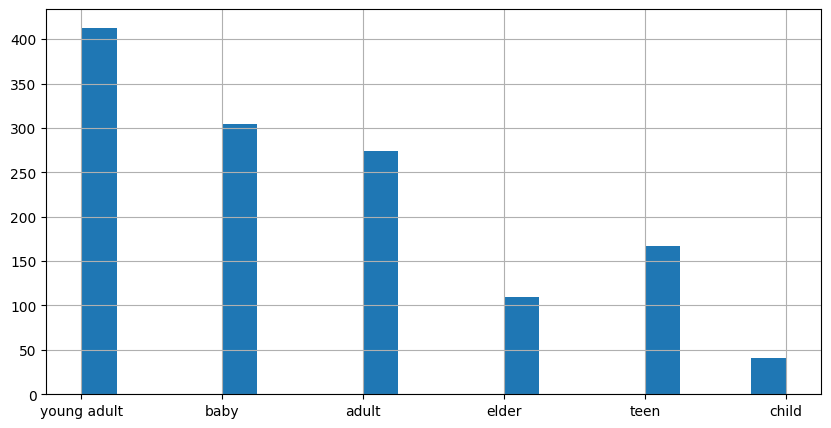

In [161]:
Titanic['age category'].hist(bins=20,figsize=(10,5))

In [167]:

# now display surivied in each age phase

for i in Titanic['age category'].unique():
    print(i)
    phase=Titanic[Titanic['age category']==i]
    phase_alive=phase[phase['survived']==1]
    phase_perc=(phase_alive.shape[0]/phase.shape[0])*100
    print(f"{i} count is  {phase.shape[0]}")
    print('survived is ',"%.2f"%phase_perc,'%\n======\n')
    

young adult
young adult count is  413
survived is  38.26 %

baby
baby count is  304
survived is  32.57 %

adult
adult count is  274
survived is  40.51 %

elder
elder count is  110
survived is  40.00 %

teen
teen count is  167
survived is  38.32 %

child
child count is  41
survived is  58.54 %



In [168]:
Titanic.to_csv("D:\Ai\IEEE\pandas\Final Project/Titanic_Cleand",sep='\t',encoding='utf8')